In this part, we'll do a quick exploratory  data analysis to see some statistics, explore and understand the data, gain valuable insights.

In [1]:
import pandas as pd

In [2]:
#Load the dataset
df = pd.read_csv('framingham.csv')

In [3]:
#Inspect columns, for more feature information, visit
#https://archive.ics.uci.edu/dataset/45/heart+disease
df.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
#Check first five rows
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#Descriptive statistics
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
#Information about the features, e.g columns
#It can help determine, which are the categoricals for further analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [13]:
#Detect any missing value, for later feautre engineering
df.isnull().sum()


sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

I created bar plots for each categorical feature, and subsequently identified an interesting bias in the data. Upon reviewing the proportion diagrams, it became evident that the data is skewed. 

What does this imply? 

Given that this is a binary classification problem with two classes in TenYearCHD - either having heart disease or not - the significant disparity in proportions (85% - 15%) suggests that the model we're about to train will likely generate a considerable number of false negative results.


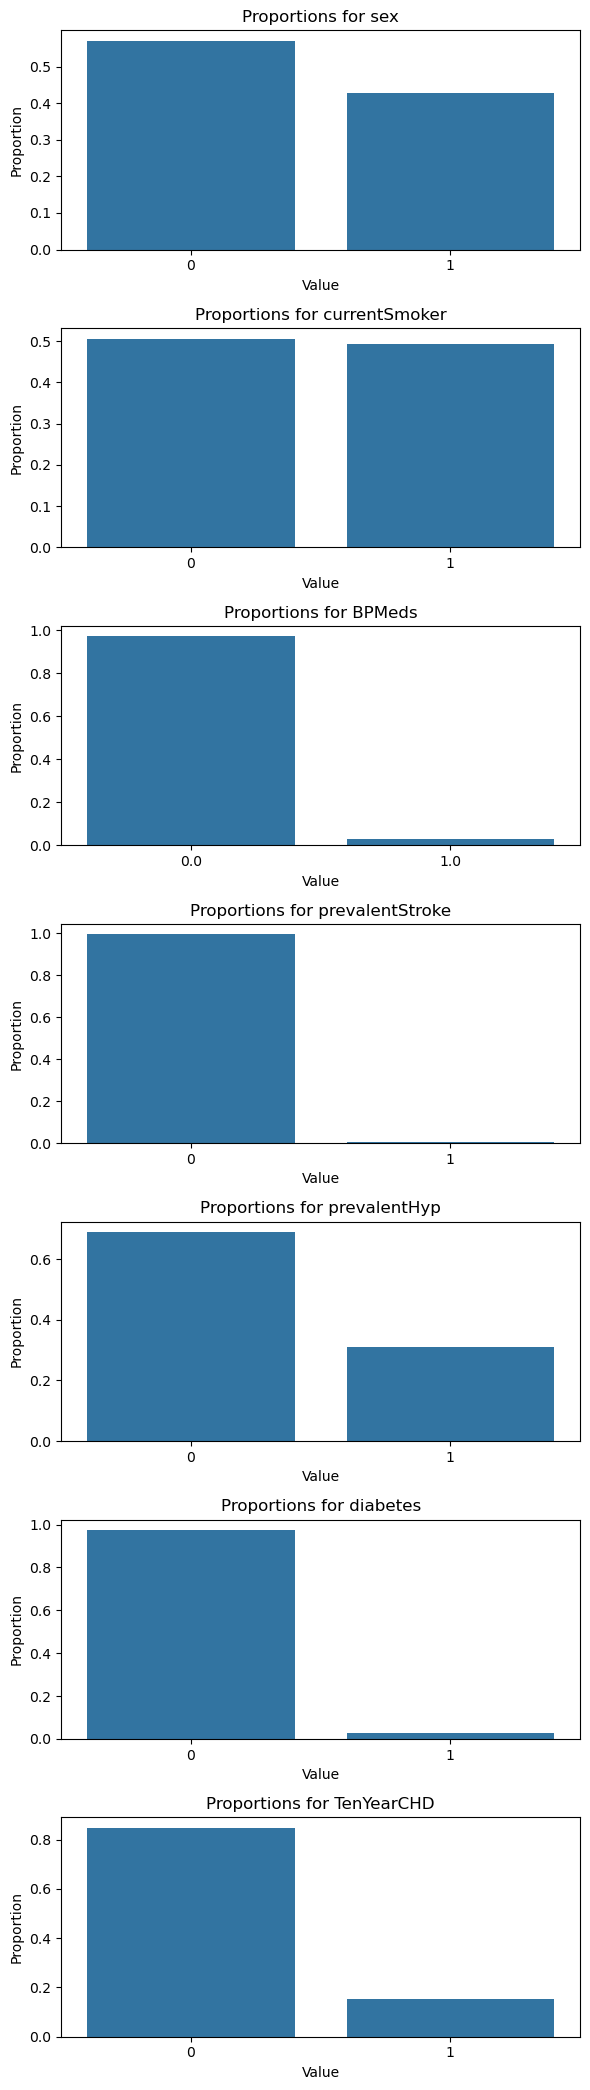

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define binary categorical columns
binary_categorical_columns = ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

# Set up subplots
fig, axes = plt.subplots(nrows=len(binary_categorical_columns), ncols=1, figsize=(6, 3*len(binary_categorical_columns)))

# Iterate over each binary categorical column and plot proportions
for i, column in enumerate(binary_categorical_columns):
    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)
    
    # Plot proportions as bar plot
    sns.barplot(x=proportions.index, y=proportions.values, ax=axes[i])
    axes[i].set_title(f'Proportions for {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Proportion')


# Adjust layout
plt.tight_layout()
plt.show()


For further illustration, I'll plot the distribution of TenYearCHD data against age. This will allow us to clearly visualize the problem.

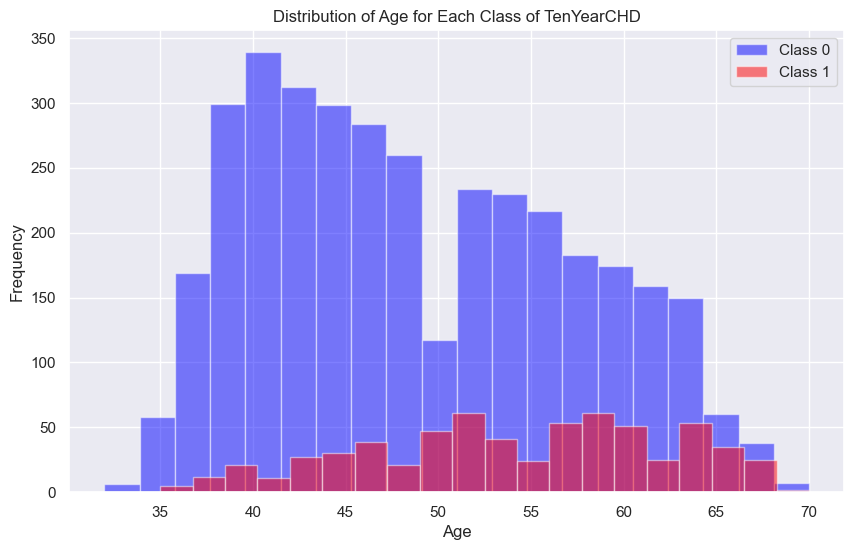

In [21]:
sns.set_theme()
chd_0 = df[df['TenYearCHD'] == 0]
chd_1 = df[df['TenYearCHD'] == 1]

# Plotting the distribution of each subset
plt.figure(figsize=(10, 6))

# Plot for CHD = 0
plt.hist(chd_0['age'], bins=20, alpha=0.5, color='blue', label='Class 0')

# Plot for CHD = 1
plt.hist(chd_1['age'], bins=20, alpha=0.5, color='red', label='Class 1')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Each Class of TenYearCHD')
plt.legend()
plt.grid(True)
plt.show()

Finally, let's conduct a correlation analysis. This analysis is highly informative as it enables us to understand the relationships between different features and the target variable. The heatmap visually represents how different features are related to each other. Subsequently, we can examine their relationship with CHD.

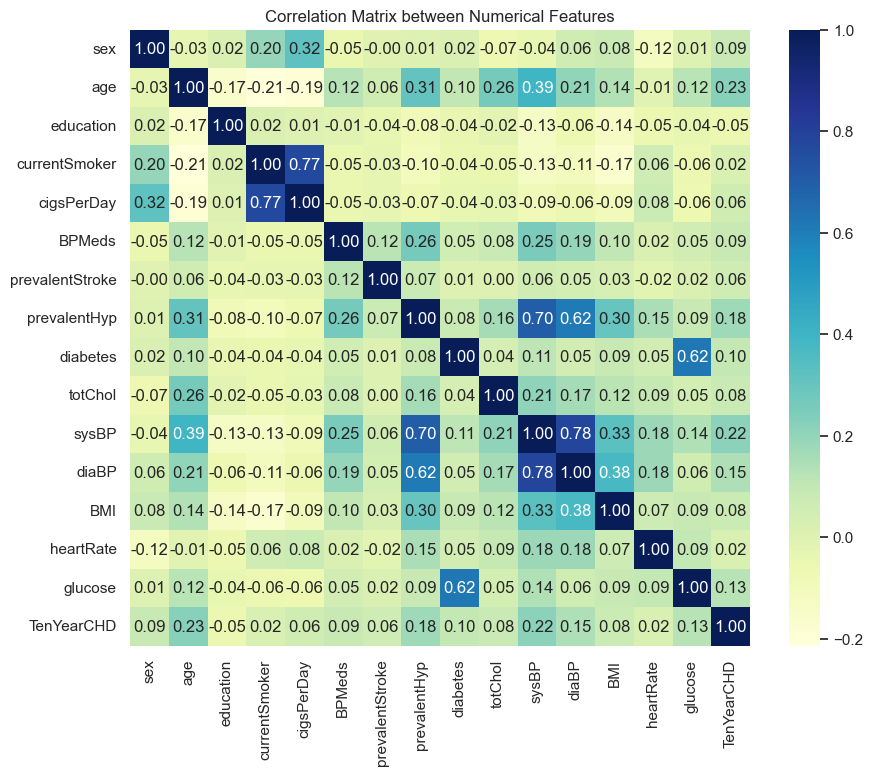

Correlations with the target variable (CHD):
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
sex                0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64


In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix between Numerical Features')
plt.show()

# Investigate correlations between features and the target variable (CHD)
#With dropping, we exclude the target variable from the correlations
chd_correlations = correlation_matrix['TenYearCHD'].drop('TenYearCHD')  
print("Correlations with the target variable (CHD):")
print(chd_correlations.sort_values(ascending=False))


Age, systolic blood pressure (sysBP), and diastolic blood pressure (diaBP) show relatively strong positive correlations with the risk of developing coronary heart disease (CHD).
Prevalent hypertension (prevalentHyp) and diabetes display moderate correlation, and other factors such as glucose levels, sex, total cholesterol (totChol) and BMI demonstrate similar moderate correlation.
Interestingly, education show negative correlation! In the model training part, we may consider exclude this feature.